In [90]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [91]:
# 2. Đọc file dữ liệu và chia train test validate theo tỉ lệ 6:3:1
df = pd.read_csv('/content/NKG-Historical-Data.csv', sep=",")
df=df['Price']

df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
df = df.str.replace(',', '').astype(float)

# Split the data into training, testing, and validation sets
train_size = int(0.8 * len(df))
test_size = int(0.2 * len(df))

train_data = df[:train_size]
test_data = df[train_size:]

In [92]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data)
# Convert y_train to numeric, removing commas and handling potential errors

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [93]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data)
y_pred = model.predict(x_test)

In [94]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[9019.020346   9006.52467558 8994.02900515 8981.53333473 8969.0376643
 8956.54199388 8944.04632345 8931.55065303 8919.0549826  8906.55931217
 8894.06364175 8881.56797132 8869.0723009  8856.57663047 8844.08096005
 8831.58528962 8819.0896192  8806.59394877 8794.09827835 8781.60260792
 8769.1069375  8756.61126707 8744.11559665 8731.61992622 8719.1242558
 8706.62858537 8694.13291495 8681.63724452 8669.1415741  8656.64590367]


In [95]:
# 7. Đánh giá độ chính xác thuật toán
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

#MAPE
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Testing MAPE:', test_mape)

#MAE
test_mae = np.mean(np.abs(y_pred - y_test))
print('Testing MAE:', test_mae)

Testing RMSE: 6321.347153452771
Testing MAPE: 144.61378883754023
Testing MAE: 6247.944659604206


In [96]:
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)

# Create an array of 90 consecutive integers starting from last_index
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)

# Predict the closing prices for the next 90 days
y_next_90_days = model.predict(x_next_90_days)

# Print the predicted closing prices for the next 90 days
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 90 days:
[9019.020346   9006.52467558 8994.02900515 8981.53333473 8969.0376643
 8956.54199388 8944.04632345 8931.55065303 8919.0549826  8906.55931217
 8894.06364175 8881.56797132 8869.0723009  8856.57663047 8844.08096005
 8831.58528962 8819.0896192  8806.59394877 8794.09827835 8781.60260792
 8769.1069375  8756.61126707 8744.11559665 8731.61992622 8719.1242558
 8706.62858537 8694.13291495 8681.63724452 8669.1415741  8656.64590367
 8644.15023325 8631.65456282 8619.1588924  8606.66322197 8594.16755155
 8581.67188112 8569.1762107  8556.68054027 8544.18486985 8531.68919942
 8519.193529   8506.69785857 8494.20218815 8481.70651772 8469.2108473
 8456.71517687 8444.21950645 8431.72383602 8419.2281656  8406.73249517
 8394.23682475 8381.74115432 8369.2454839  8356.74981347 8344.25414305
 8331.75847262 8319.2628022  8306.76713177 8294.27146135 8281.77579092
 8269.28012049 8256.78445007 8244.28877964 8231.79310922 8219.29743879
 8206.80176837 8194.30609794 8181

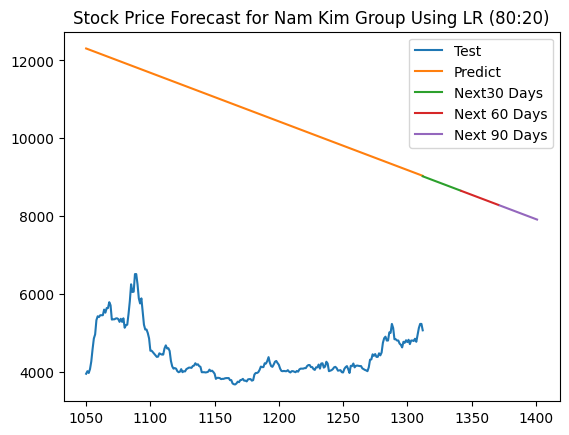

In [97]:
# 8.Vẽ hình
plt.plot(test_data.index, test_data)
plt.plot(test_data.index, y_pred)
plt.plot(range(last_data.start, last_data.start + 30), y_next_90_days[:30])
plt.plot(range(last_data.start+30, last_data.start + 60), y_next_90_days[30:60])
plt.plot(range(last_data.start+60, last_data.start + 90), y_next_90_days[60:90])
plt.legend(['Test', 'Predict','Next30 Days', "Next 60 Days", "Next 90 Days"])
plt.title("Stock Price Forecast for Nam Kim Group Using LR (80:20)")
plt.show()

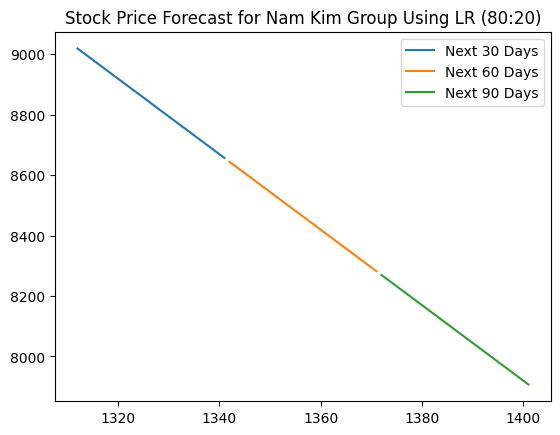

In [98]:
plt.plot(range(last_data.start, last_data.start + 30), y_next_90_days[:30])
plt.plot(range(last_data.start+30, last_data.start + 60), y_next_90_days[30:60]) # Slice y_next_90_days to match x-axis dimensions
plt.plot(range(last_data.start+60, last_data.start + 90), y_next_90_days[60:90])
plt.legend(["Next 30 Days", "Next 60 Days", "Next 90 Days"])
plt.title("Stock Price Forecast for Nam Kim Group Using LR (80:20)")
plt.show()